# Capstone Project 1

In [57]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from statsmodels import *
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
%matplotlib inline  
pd.set_option('max_columns', 100)

## Data Cleaning/Wrangling

In [58]:
data=pd.read_csv('student-por.csv')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,5,1,1,1,5,0,12,12,13


In [59]:
data['Talc']=data['Dalc'] + data['Walc']

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 no

## Exploratory Data Analysis

In [61]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Talc
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009,3.782743
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656,1.992411
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000,2.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000,3.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,5.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000,10.000000


In [62]:
data.Talc.groupby(data['sex']).describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
F,383.0,3.221932,1.475929,2.0,2.0,3.0,4.0,10.0
M,266.0,4.590226,2.336208,2.0,2.0,4.0,6.0,10.0


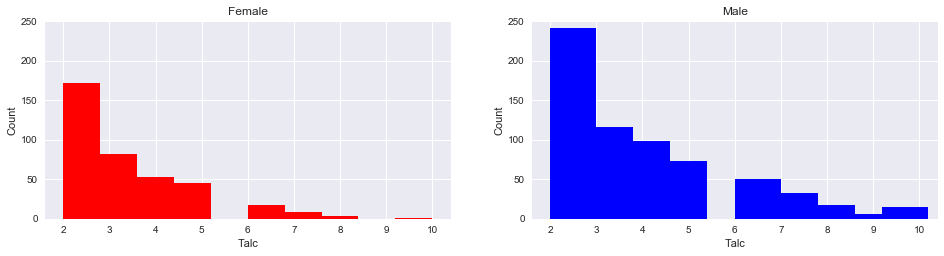

In [95]:
female=data[data['sex'] =='F']
female=female.Talc
male=data[data['sex'] =='M']
male=data.Talc
bins = 10

fig=plt.figure()
fig.set_size_inches(16, 8)
ax1=fig.add_subplot(2,2, 1)
ax2=fig.add_subplot(2,2, 2)
ax1.hist(female, bins, histtype='bar', rwidth=1, color='r')
ax2.hist(male, bins, histtype='bar', width=1, color="b")
ax1.title.set_text('Female')
ax1.set_xlabel("Talc")
ax1.set_ylabel("Count")
ax1.set_ylim(bottom=0, top=250)
ax2.title.set_text('Male')
ax2.set_xlabel("Talc")
ax2.set_ylabel("Count")
ax2.set_ylim(bottom=0, top=250)
plt.show()

sex
F    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Talc, dtype: object

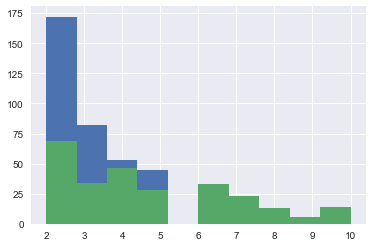

In [89]:
data.Talc.groupby(data['sex']).hist()

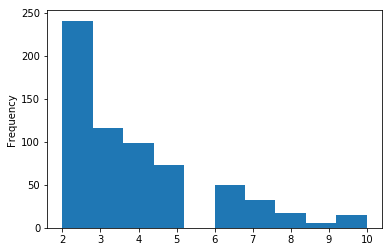

In [8]:
data.Talc.plot.hist()

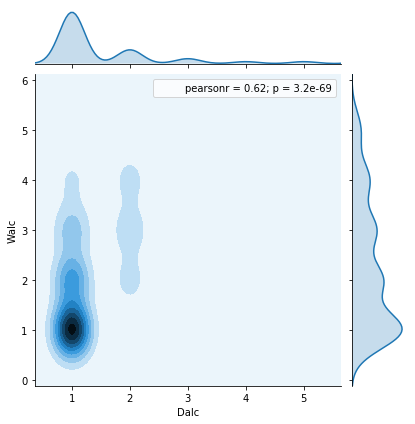

In [9]:
sns.jointplot(x= 'Dalc', y= 'Walc', data=data, kind='kde') 

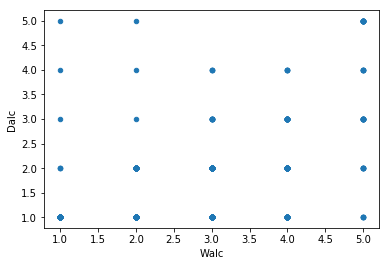

In [10]:
data.plot.scatter(y="Dalc", x="Walc")

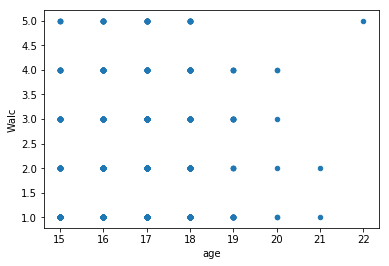

In [11]:
data.plot.scatter(y="Walc", x="age")

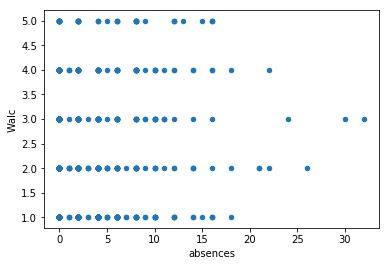

In [12]:
data.plot.scatter(y="Walc", x="absences")

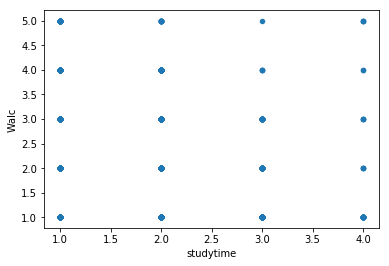

In [13]:
data.plot.scatter(y="Walc", x="studytime")

In [14]:
#Correlation matrix of all variables
corr=data.corr()
corr

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Talc
age,1.000000,-0.107832,-0.121050,0.034490,-0.008415,0.319968,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998,-0.174322,-0.107119,-0.106505,0.118226
Medu,-0.107832,1.000000,0.647477,-0.265079,0.097006,-0.172210,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577,0.260472,0.264035,0.240151,-0.015999
Fedu,-0.121050,0.647477,1.000000,-0.208288,0.050400,-0.165915,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.217501,0.225139,0.211800,0.024811
traveltime,0.034490,-0.265079,-0.208288,1.000000,-0.063154,0.097730,-0.009521,0.000937,0.057454,0.092824,0.057007,-0.048261,-0.008149,-0.154120,-0.154489,-0.127173,0.079836
studytime,-0.008415,0.097006,0.050400,-0.063154,1.000000,-0.147441,-0.004127,-0.068829,-0.075442,-0.137585,-0.214925,-0.056433,-0.118389,0.260875,0.240498,0.249789,-0.202412
failures,0.319968,-0.172210,-0.165915,0.097730,-0.147441,1.000000,-0.062645,0.108995,0.045078,0.105949,0.082266,0.035588,0.122779,-0.384210,-0.385782,-0.393316,0.102211
famrel,-0.020559,0.024421,0.020256,-0.009521,-0.004127,-0.062645,1.000000,0.129216,0.089707,-0.075767,-0.093511,0.109559,-0.089534,0.048795,0.089588,0.063361,-0.095450
freetime,-0.004910,-0.019686,0.006841,0.000937,-0.068829,0.108995,0.129216,1.000000,0.346352,0.109904,0.120244,0.084526,-0.018716,-0.094497,-0.106678,-0.122705,0.128528
goout,0.112805,0.009536,0.027690,0.057454,-0.075442,0.045078,0.089707,0.346352,1.000000,0.245126,0.388680,-0.015741,0.085374,-0.074053,-0.079469,-0.087641,0.364339
Dalc,0.134768,-0.007018,0.000061,0.092824,-0.137585,0.105949,-0.075767,0.109904,0.245126,1.000000,0.616561,0.059067,0.172952,-0.195171,-0.189480,-0.204719,0.861636


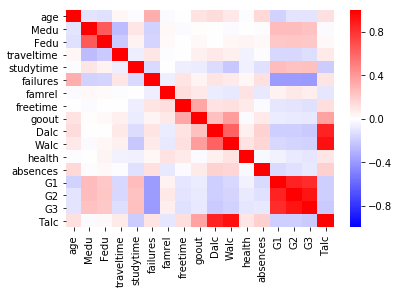

In [15]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        vmin=-1,
        vmax=1,
        center=0,
        cmap = matplotlib.cm.get_cmap('bwr'))

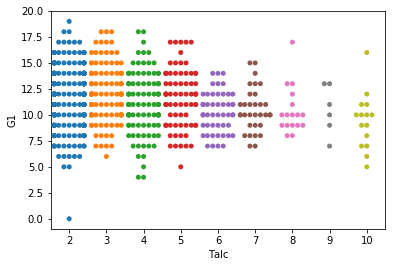

In [16]:
sns.swarmplot(x='Talc', y='G1', data=data) 

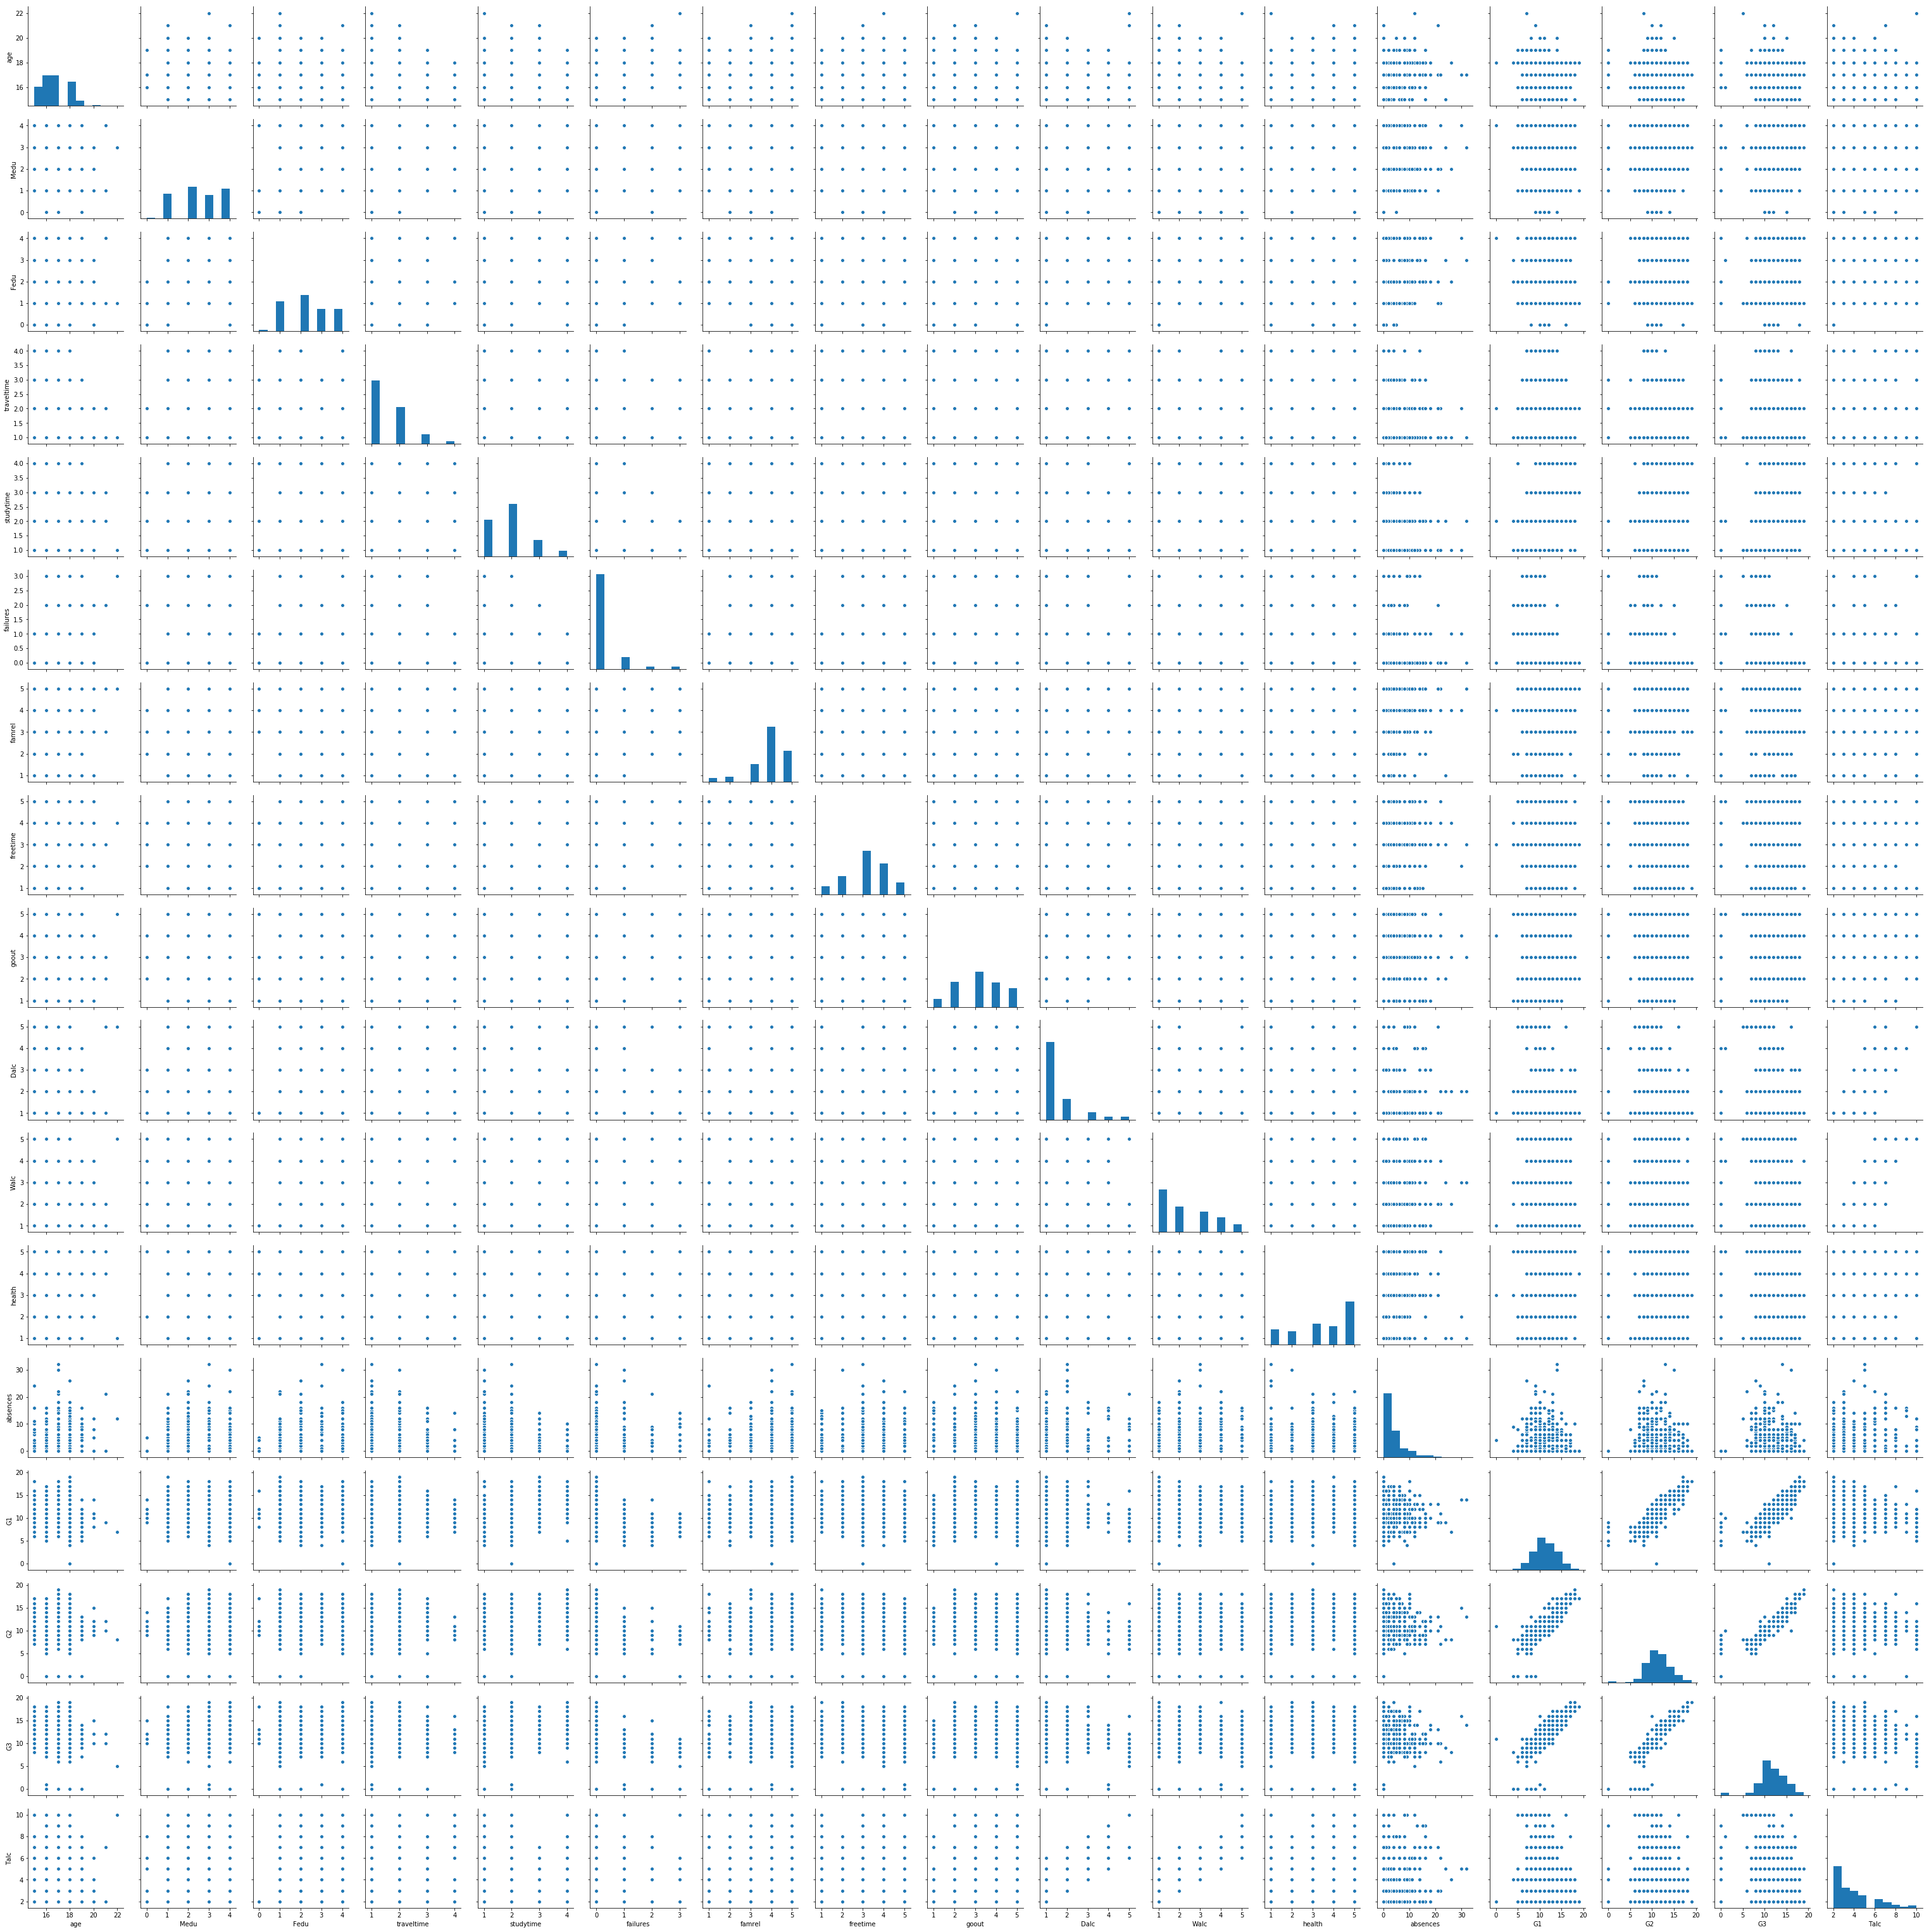

In [17]:
sns.pairplot(data)

## Inferential Statistics

In [18]:
#pearson r correlation between G1 and G2
stats.pearsonr(data["G1"], data["G2"])

(0.8649816303085822, 6.373794780789756e-196)

In [19]:
#pearson r correlation between G1 and G3
stats.pearsonr(data["G1"], data["G3"])

(0.8263871247890472, 1.617571007349402e-163)

In [20]:
#pearson r correlation between G2 and G3
stats.pearsonr(data["G3"], data["G2"])

(0.9185480035603509, 5.6424014895849495e-263)

In [21]:
#pearson r correlation between Dalc and Walc
stats.pearsonr(data["Dalc"], data["Walc"])

(0.6165613820643417, 3.2392443113278253e-69)

In [22]:
#pearson r correlation between studytime and Walc
stats.pearsonr(data["studytime"], data["Walc"])

(-0.21492510452682603, 3.2112406378592824e-08)

In [23]:
#pearson r correlation between studytime and Dalc
stats.pearsonr(data["studytime"], data["Dalc"])

(-0.13758473944246913, 0.0004397381567884411)

In [24]:
#create dummy variables
data=pd.get_dummies(data)

In [25]:
data.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Talc,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11,2,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11,2,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13,12,5,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,14,14,2,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,2,5,0,11,13,13,3,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0


### Machine Learning Using Linear Regression

In [26]:
#creating target and features
features = list(data.columns)
y=data[features[16]]  #setting Talc as the target
features.remove('Talc')
features.remove('Dalc')
features.remove('Walc')

X = data[features] #removing Talc, Walc, and Dalc from the features

In [27]:
y

0       2
1       2
2       5
3       2
4       3
5       3
6       2
7       2
8       2
9       2
10      3
11      2
12      4
13      3
14      2
15      3
16      3
17      2
18      6
19      4
20      2
21      2
22      4
23      6
24      2
25      4
26      3
27      6
28      2
29     10
       ..
619     4
620     2
621     3
622     6
623     4
624     3
625     3
626     6
627     5
628     2
629     4
630     2
631     3
632     2
633     7
634     3
635     5
636     5
637     4
638     2
639     4
640     7
641     4
642     2
643     4
644     3
645     2
646     2
647     7
648     7
Name: Talc, Length: 649, dtype: int64

In [28]:
X

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,3,4,0,11,11,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,3,2,9,11,11,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,3,6,12,13,12,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,5,0,14,14,14,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,5,0,11,13,13,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0
5,16,4,3,1,2,0,5,4,2,5,6,12,12,13,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,1,0
6,16,2,2,1,2,0,4,4,4,3,0,13,12,13,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0
7,17,4,4,2,2,0,4,1,4,1,2,10,13,13,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0
8,15,3,2,1,2,0,4,2,2,1,0,15,16,17,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,1,0
9,15,3,4,1,2,0,5,5,1,5,0,12,12,13,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,1,0


In [29]:
#creating the linear regression model
reg_all=linear_model.LinearRegression()

In [30]:
#fitting the linear regression
reg_all.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
#view the intercept
reg_all.intercept_

347056866765.5805

In [32]:
#view the feature coefficients
reg_all.coef_

array([ 1.07089110e-01, -5.47713392e-02,  8.88606985e-02,  8.75449400e-02,
       -1.94767564e-01, -5.88117146e-02, -3.26132282e-01, -4.29567206e-02,
        5.88740720e-01,  1.21723893e-01,  4.83977834e-02, -3.33677308e-02,
        3.16073084e-02, -5.56381166e-02,  9.18888955e+10,  9.18888955e+10,
        2.08454109e+11,  2.08454109e+11,  2.26025820e+11,  2.26025820e+11,
       -1.73735111e+11, -1.73735111e+11,  6.22373749e+10,  6.22373749e+10,
       -8.86144289e+10, -8.86144289e+10, -8.86144289e+10, -8.86144289e+10,
       -8.86144289e+10, -1.48613477e+11, -1.48613477e+11, -1.48613477e+11,
       -1.48613477e+11, -1.48613477e+11, -2.47742492e+11, -2.47742492e+11,
       -2.47742492e+11, -2.47742492e+11,  2.96355230e+10,  2.96355230e+10,
        2.96355230e+10,  3.69541586e+11,  3.69541586e+11, -4.27130911e+10,
       -4.27130911e+10,  6.87057257e+10,  6.87057257e+10,  2.17518385e+10,
        2.17518385e+10, -1.24227061e+11, -1.24227061e+11, -5.37920768e+10,
       -5.37920768e+10, -

In [33]:
feat=list(X)
feat_array=np.asarray(feat)
feat_array

array(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R',
       'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A',
       'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course',
       'reason_home', 'reason_other', 'reason_reputation',
       'guardian_father', 'guardian_mother', 'guardian_other',
       'schoolsup_no', 'schoolsup_yes', 'famsup_no', 'famsup_yes',
       'paid_no', 'paid_yes', 'activities_no', 'activities_yes',
       'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes',
       'internet_no', 'internet_yes', 'romantic_no', 'romantic_yes'],
      dtype='<U17')

In [34]:
#creating dataframe of edtimated coeficients
coef=pd.DataFrame({'estimatedCoefficients': reg_all.coef_,
              'features':feat_array })
coef.sort_values('estimatedCoefficients')

,estimatedCoefficients,features
55,-4.267553e+11,romantic_no
56,-4.267553e+11,romantic_yes
34,-2.477425e+11,reason_course
37,-2.477425e+11,reason_reputation
35,-2.477425e+11,reason_home
36,-2.477425e+11,reason_other
20,-1.737351e+11,famsize_GT3
21,-1.737351e+11,famsize_LE3
33,-1.486135e+11,Fjob_teacher
29,-1.486135e+11,Fjob_at_home


In [35]:
#coefficient of determination(r-sqare value)
reg_all.score(X, y)

0.3506896776572973

In [36]:
#splitting data into test and training sets
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=30)

In [99]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
# Fit regression model on training data using Statsmodels
model=sm.OLS(y_train, X_train)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Talc   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     6.280
Date:                Mon, 18 Jun 2018   Prob (F-statistic):           5.29e-24
Time:                        20:00:58   Log-Likelihood:                -855.15
No. Observations:                 454   AIC:                             1792.
Df Residuals:                     413   BIC:                             1961.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                   0.1740      0.079      2.213      0.027       0.019       0.328
Medu                 -0.1169      0.113     -1.036      0.301      -0.339       0.105
Fedu                  0.0657      0.106      0.621      0.535      -0.142       0.273
traveltime           -0.0354      0.121     -0.292      0.770      -0.273       0.203
studytime            -0.1854      0.109     -1.709      0.088      -0.399       0.028
failures             -0.1293      0.156     -0.831      0.406      -0.435       0.176
famrel               -0.3085      0.093     -3.321      0.001      -0.491      -0.126
freetime             -0.0669      0.085     -0.788      0.431      -0.234       0.100
goout                 0.6216      0.076      8.127      0.000       0.471       0.772
health                0.1271      0.059      2.140      0.033       0.010       0.244
absences              0.0422      0.020      2.150      0.032       0.004       0.081
G1                   -0.0793      0.066     -1.208      0.228      -0.208       0.050
G2                    0.0825      0.080      1.034      0.302      -0.074       0.239
G3                   -0.0894      0.065     -1.378      0.169      -0.217       0.038
school_GP             0.0645      0.147      0.437      0.662      -0.225       0.354
school_MS             0.1633      0.142      1.154      0.249      -0.115       0.442
sex_F                -0.4730      0.140     -3.369      0.001      -0.749      -0.197
sex_M                 0.7007      0.130      5.384      0.000       0.445       0.957
address_R             0.1110      0.142      0.779      0.436      -0.169       0.391
address_U             0.1168      0.138      0.849      0.396      -0.154       0.387
famsize_GT3          -0.1012      0.135     -0.750      0.454      -0.366       0.164
famsize_LE3           0.3290      0.136      2.419      0.016       0.062       0.596
Pstatus_A             0.0497      0.163      0.305      0.760      -0.270       0.370
Pstatus_T             0.1781      0.165      1.083      0.280      -0.145       0.501
Mjob_at_home          0.0060      0.207      0.029      0.977      -0.401       0.413
Mjob_health          -0.0854      0.280     -0.305      0.761      -0.636       0.465
Mjob_other           -0.0374      0.158     -0.237      0.813      -0.348       0.273
Mjob_services        -0.1189      0.181     -0.657      0.512      -0.475       0.237
Mjob_teacher          0.4634      0.251      1.849      0.065      -0.029       0.956
Fjob_at_home         -0.2763      0.294     -0.939      0.348      -0.855       0.302
Fjob_health           0.0903      0.394      0.229      0.819      -0.685       0.865
Fjob_other            0.1791      0.184      0.975      0.330      -0.182       0.540
Fjob_services         0.4310      0.193      2.227      0.026       0.051

In [100]:
# Fit regression model on training data using Statsmodels
model=sm.OLS(y_test, X_test)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Talc   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     3.271
Date:                Mon, 18 Jun 2018   Prob (F-statistic):           8.06e-08
Time:                        20:03:17   Log-Likelihood:                -343.70
No. Observations:                 195   AIC:                             769.4
Df Residuals:                     154   BIC:                             903.6
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                   0.0340      0.119      0.287      0.774      -0.200       0.268
Medu                  0.2826      0.187      1.510      0.133      -0.087       0.652
Fedu                  0.1192      0.150      0.796      0.427      -0.176       0.415
traveltime            0.2302      0.185      1.242      0.216      -0.136       0.597
studytime            -0.3882      0.163     -2.380      0.019      -0.710      -0.066
failures              0.0370      0.271      0.137      0.892      -0.498       0.572
famrel               -0.2997      0.120     -2.496      0.014      -0.537      -0.062
freetime             -0.0537      0.135     -0.396      0.693      -0.321       0.214
goout                 0.4826      0.120      4.039      0.000       0.247       0.719
health                0.0779      0.095      0.817      0.415      -0.110       0.266
absences              0.0478      0.027      1.765      0.079      -0.006       0.101
G1                    0.0601      0.086      0.703      0.483      -0.109       0.229
G2                   -0.0923      0.132     -0.700      0.485      -0.353       0.168
G3                    0.0015      0.109      0.014      0.989      -0.213       0.216
school_GP             0.4122      0.216      1.905      0.059      -0.015       0.840
school_MS            -0.1547      0.219     -0.706      0.481      -0.588       0.278
sex_F                -0.2079      0.202     -1.031      0.304      -0.606       0.190
sex_M                 0.4654      0.214      2.171      0.031       0.042       0.889
address_R             0.3717      0.222      1.671      0.097      -0.068       0.811
address_U            -0.1142      0.217     -0.527      0.599      -0.542       0.314
famsize_GT3          -0.0402      0.199     -0.202      0.840      -0.432       0.352
famsize_LE3           0.2977      0.222      1.341      0.182      -0.141       0.736
Pstatus_A            -0.3795      0.268     -1.418      0.158      -0.908       0.149
Pstatus_T             0.6370      0.258      2.470      0.015       0.127       1.147
Mjob_at_home          0.5646      0.334      1.689      0.093      -0.096       1.225
Mjob_health          -0.4305      0.388     -1.110      0.269      -1.197       0.336
Mjob_other           -0.2317      0.252     -0.919      0.359      -0.730       0.266
Mjob_services         0.5054      0.264      1.915      0.057      -0.016       1.027
Mjob_teacher         -0.1503      0.423     -0.355      0.723      -0.986       0.685
Fjob_at_home          0.3634      0.511      0.712      0.478      -0.645       1.372
Fjob_health          -0.3374      0.544     -0.620      0.536      -1.412       0.737
Fjob_other            0.1799      0.254      0.707      0.480      -0.323       0.682
Fjob_services         0.6757      0.269      2.510      0.013       0.144

### Cross-Validation of Linear Regression

In [37]:
#cross validation
cv_results=cross_val_score(reg_all, X_train, y_train, cv=5)
cv_results

array([0.19877216, 0.09865455, 0.05131695, 0.15636613, 0.45948795])

In [38]:
np.mean(cv_results)

0.19291954823212193

In [39]:
y_pred=reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.326949643830742

### Machine Learning Using SVM

In [104]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_train, y_train)

0.44052863436123346

In [105]:
svm.fit(X_test, y_test)
svm.score(X_test, y_test)

0.5025641025641026

### Machine Learning Using Decision Tree

In [110]:
from sklearn import tree
dectree= tree.DecisionTreeClassifier()
dectree.fit(X_train, y_train)
dectree.score(X_train, y_train)

1.0

In [111]:
dectree.fit(X_test, y_test)
dectree.score(X_test, y_test)

1.0

### Machine Learning Using Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifier
randf= RandomForestClassifier()
randf.fit(X_train, y_train)
randf.score(X_train, y_train)

0.986784140969163

In [114]:
randf.fit(X_test, y_test)
randf.score(X_test, y_test)

0.9846153846153847

### Machine Learning Using Gradient Boosting

In [115]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb.score(X_train, y_train)

0.986784140969163

In [116]:
gb.fit(X_test, y_test)
gb.score(X_test, y_test)

1.0